<p style="font-family: Arial; font-size:3.5em;color:purple; font-style:bold"><br>
Simple Image Filter
</p>
<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
I made this simple filter using Numpy.
</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">Loading libraries:</p>
<p style="font-family: Arial;">First let's import libraries that we need.</p>

In [282]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import imageio

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">Loading a photo:</p><br>
    After that we read the image from the path we stored it using imageio. Then we store all pixels' data in RGB format in an array.

In [394]:
image_data = imageio.imread('./octapus.jpg')

Let's take a look at our image.

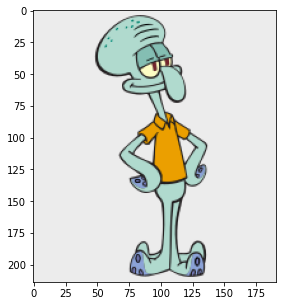

In [395]:
plt.figure(figsize=(5,5))
plt.imshow(image_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">Data Validation:</p>
    <p style="font-family: Arial;">
    Our data is an image here that we took a look at, and it looks just fine. So maybe this seems unnecessary to 
    take data validation step. 
    However, it is always a good idea to validate your data as much as possible.
    Simple validation for this RGB format is checking the range of data.
    </p>

In [396]:
# we expect three dimensions array for image_data shape (length, width, RGB color)
print('Our image data shape is: ', image_data.shape)

Our image data shape is:  (214, 191, 4)


<p style="font-family: Arial;">
         We expect our data to have three dimensions, one for length, one for width and another for storing the RGB color. Also, we know that we need three numbers for RGB color. But as you see we have four numbers, this extra number refers to transparency, but we ignore it here because we want to make a super simple filter.
    </p>

In [289]:
# we expect data range to be from 0 to 255 because of the RGB format
print('Our data are between', image_data.min(), 'and', image_data.max(), '.')

Our data are between 0 and 255 .


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">Making simple filters:</p>
    <p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">Changing specific color range:</p>
    <p style="font-family: Arial;">
    He most of the time wears the same T-shirt, so let's change it for him!
    I printed out a slice of the data to check out his T-shirt color but not all of his T-shirt have the same RGB code so I tried to find a range by trying to cover most part of his T-shirt.
    <ol>
      <li>First we read the image using imageio.</li>
      <li>Then we ignore fourth coloumn as it's associated with transparency.</li>
        <li>Then we check for a specefic color range and use <b>'logical and'</b> to filter pixels that have all requirements that we are looking for.</li>
    </ol>
</p>

The image_data shape is: (214, 191, 3)


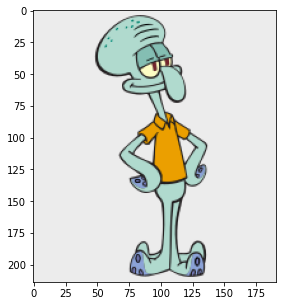

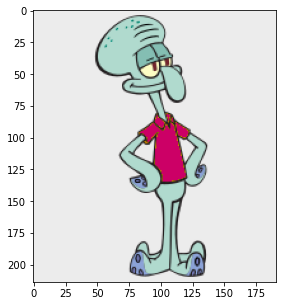

In [398]:
octapus_image_data = imageio.imread('./octapus.jpg')
plt.figure(figsize=(5,5))
image_data = octapus_image_data[:,:,0:3]
print('The image_data shape is:', image_data.shape)
plt.imshow(image_data)
# detecting the RGB range for his T-shirt
red_filter = np.logical_and(200 < image_data[:,:,0], image_data[:,:,0] < 236)
green_filter = np.logical_and(140 < image_data[:,:,1], image_data[:,:,1] < 160)
blue_filter = (image_data[:,:,2] < 50)
# finally we use logical and to detect his T-shirt
final_mask = np.logical_and(red_filter, green_filter, blue_filter)
# changing T-shirt color to what we like
image_data[final_mask] = (204, 0, 102)
plt.figure(figsize=(5,5))
plt.imshow(image_data)

Well, it looks better now. However, some points are not detected. Remember this aimed to be simple image filter, so it's good enough for now! <br>
We could also change the bakcground color.

 <p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">Black and white filter:</p>
 <p style="font-family: Arial;">
    Now, let's make a black and white filter.
    <ol>
      <li>First we read the image using imageio.</li>
          <li>We can change our image to black and white by calculating RGB value of each pixel using following equation:
              <p>gray_value = 0.2989 * red + 0.5870 * green + 0.1140 * blue</p>
              As you can see in the code we calculate this value by using dot product that do the same thing. Then we use numpy.tile to replicate this column for three times. Means that all red, blue and green value should be the same.
       </li>
    </ol>
</p>

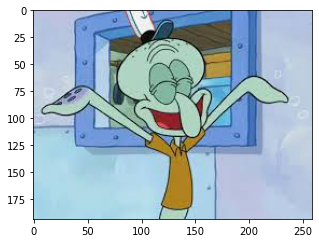

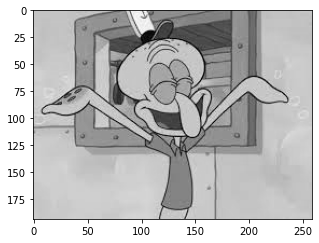

In [400]:
image_data = imageio.imread('./octapus1.jpg')
plt.figure(figsize=(5,5))
plt.imshow(image_data)
black_white = np.zeros(image_data.shape)
gray_value = ((np.dot(image_data, [[0.2989], [0.5870], [0.1140]])))
# replicate gray 3 times so all Red, Green and Blue columns will get the same value for each pixel
black_white = np.tile(gray_value.astype(int), (1,1,3))
# print(gray_scale)
plt.figure(figsize=(5,5))
plt.imshow(black_white)

 <p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">Circular frame:</p>
 <p style="font-family: Arial;">
    Now, let's make a circular frame for our image.
    <ol>
      <li>First we read the image using imageio.</li>
      <li>
         Then we make a grid using numpy.ogrid and then we calcule distance of each point to the center of grid.
      </li>
        <li>In last step, we look for points that are out of a hypothetical circle and we change them to black
      </li>
    </ol>
</p>

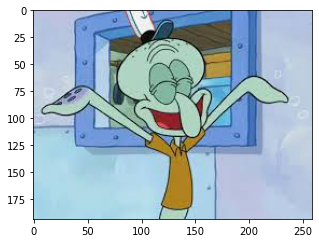

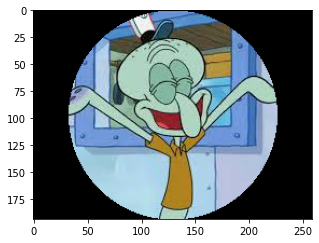

In [404]:
image_data = imageio.imread('./octapus1.jpg')
plt.figure(figsize=(5,5))
plt.imshow(image_data)
total_rows, total_cols, total_layers = image_data.shape
x, y = np.ogrid[:total_rows, :total_cols]
center_row = total_rows / 2
center_col = total_cols / 2
distance_from_center = (x - center_row) ** 2 + (y - center_col) ** 2
radius = (total_rows / 2) ** 2
circular_mask = (distance_from_center > radius)
image_data[circular_mask] = (0, 0, 0)
plt.figure(figsize=(5,5))
plt.imshow(image_data)

<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>
Have a question?
</p>
<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
Please email me if you have any question.
E-mail: saba.ahmadi96@gmail.com
</p><br>